https://m.blog.naver.com/ljh0326s/221231231739

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1], #one - hot으로 주어짐
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset / 학습시는 사용안함
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

#X,Y 값 선언
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
#Learning rate 주의! Overshooting, or Too small rate

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1)) #원핫인코딩
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


0 3.0573828 [[-1.1268083   1.021216    0.07323598]
 [-0.7791327   0.1695501  -0.7691781 ]
 [ 1.2845075   0.32257462  0.6730821 ]]
1 1.4047546 [[-1.152967    1.0179513   0.10265939]
 [-0.83003616  0.14435232 -0.69307685]
 [ 1.2026721   0.33952066  0.7379714 ]]
2 1.2415783 [[-1.1644204   1.0076879   0.12437617]
 [-0.80985564  0.07730163 -0.6462067 ]
 [ 1.1949928   0.3144123   0.77075917]]
3 1.1831968 [[-1.1798362   1.0091002   0.13837963]
 [-0.8162237   0.07180721 -0.6343442 ]
 [ 1.164257    0.34674942  0.76915777]]
4 1.1630486 [[-1.1891382   1.0064865   0.15029532]
 [-0.7920391   0.04379788 -0.63051945]
 [ 1.1652614   0.35690987  0.757993  ]]
5 1.145642 [[-1.2014517   1.0068756   0.16221972]
 [-0.7842777   0.03225321 -0.6267362 ]
 [ 1.1502246   0.3821347   0.74780506]]
6 1.1293168 [[-1.2118881   1.005512    0.17401978]
 [-0.767312    0.01108577 -0.62253445]
 [ 1.1449225   0.39758816  0.73765373]]
7 1.1136439 [[-1.2233518   1.0053151   0.18568048]
 [-0.7564673  -0.00365444 -0.61863893]
 

In [18]:
# 정규화 
# 라이브러리 사용하기.. 굳이 만들필요 없음

from sklearn.preprocessing import MinMaxScaler 

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

#정규화 
xy =MinMaxScaler().fit_transform(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5) #겁나 작은 Learning Rate
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  0.21421936 
Prediction:
 [[1.2722099 ]
 [1.7623804 ]
 [1.2245902 ]
 [0.6203725 ]
 [0.93639994]
 [0.75640047]
 [0.3154993 ]
 [0.29413295]]
1 Cost:  0.21420589 
Prediction:
 [[1.2721891 ]
 [1.7623591 ]
 [1.2245729 ]
 [0.62035936]
 [0.9363843 ]
 [0.7563852 ]
 [0.3154891 ]
 [0.29412246]]
2 Cost:  0.21419245 
Prediction:
 [[1.2721685 ]
 [1.7623379 ]
 [1.2245555 ]
 [0.6203463 ]
 [0.9363686 ]
 [0.75637007]
 [0.31547895]
 [0.29411212]]
3 Cost:  0.21417898 
Prediction:
 [[1.2721478 ]
 [1.7623167 ]
 [1.2245381 ]
 [0.62033325]
 [0.9363529 ]
 [0.75635487]
 [0.31546873]
 [0.29410166]]
4 Cost:  0.21416551 
Prediction:
 [[1.2721272 ]
 [1.7622955 ]
 [1.2245207 ]
 [0.62032014]
 [0.9363372 ]
 [0.75633967]
 [0.31545854]
 [0.29409122]]
5 Cost:  0.21415211 
Prediction:
 [[1.2721065 ]
 [1.7622744 ]
 [1.2245034 ]
 [0.620307  ]
 [0.93632156]
 [0.75632447]
 [0.31544828]
 [0.2940808 ]]
6 Cost:  0.2141387 
Prediction:
 [[1.2720859 ]
 [1.7622533 ]
 [1.224486  ]
 [0.620294  ]
 [0.9363059 ]
 [0.7563094 ]
 

## MNIST 실습 

In [9]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline



60000 60000 (60000, 28, 28) (60000,)
10000 10000 (10000, 28, 28) (10000,)
Epoch: 0001, Cost: 0.980638519
Epoch: 0002, Cost: 0.350010924
Epoch: 0003, Cost: 0.222882439
Epoch: 0004, Cost: 0.164799537
Epoch: 0005, Cost: 0.170798402
Epoch: 0006, Cost: 0.190340132
Epoch: 0007, Cost: 0.165829947
Epoch: 0008, Cost: 0.147425882
Epoch: 0009, Cost: 0.260747701
Epoch: 0010, Cost: 0.243906236
Epoch: 0011, Cost: 0.283090378
Epoch: 0012, Cost: 0.149902052
Epoch: 0013, Cost: 0.166950227
Epoch: 0014, Cost: 0.167597922
Epoch: 0015, Cost: 0.164780913
Accuracy:  0.7808
random_idx :  574
Prediction:  [3]


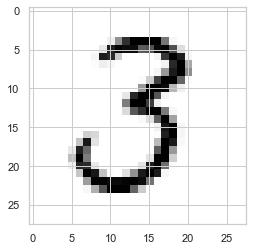

In [11]:
#소스코드 문제로 댓글에 있는 정상코드 붙여넣음 / 정확도는 낮음..

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train), len(y_train), x_train.shape, y_train.shape)
print(len(x_test), len(y_test), x_test.shape, y_test.shape)

x_train, x_test = x_train/255.0, x_test/255.0   #Feature scaling 적용

nb_classes = 10;

x_train_new = x_train.reshape(len(x_train), 784)         #60000 * 784 배열로 변경 - 한행당 이미지 하나 
y_train_new = np.zeros((len(y_train), nb_classes))       #60000 * 10 배열 생성
for i in range(len(y_train_new)):                        
  y_train_new[i,y_train[i]] = 1                          #one-hot encoding 

x_test_new = x_test.reshape(len(x_test), 784)         #60000 * 784 배열로 변경 - 한행당 이미지 하나 
y_test_new = np.zeros((len(y_test), nb_classes))       #60000 * 10 배열 생성
for i in range(len(y_test_new)):                        
  y_test_new[i,y_test[i]] = 1                          #one-hot encoding 

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])   #6만개의 학습에 대한 10개의 가설 결과

W = tf.Variable(tf.random_normal([784, nb_classes]))  #가설이 10개이고 가설별로 784개의 weigh을 가짐, 즉 7840개의 w
b = tf.Variable(tf.random_normal([nb_classes]))       #가설이 10개니 가설의 b도 10

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)  #60000 x 10 행렬 - 행별로 열의 값을 확율로 바꿈 

#cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15  # 전체 데이터 셋을 다 학습시키는 횟수 = epoch 1, 총 15번 학습 시키는 것
batch_size = 100  #한번에 몇개씩 학습시킬 것인가. 
total_batch = int(len(x_train_new) / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        
        for i in range(total_batch):
            #print (epoch,batch_size )
            batch_xs = x_train_new[(epoch * batch_size):(epoch + 1) * batch_size]     
            batch_ys = y_train_new[(epoch * batch_size):(epoch + 1) * batch_size]

            _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / total_batch
            
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))


    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: x_test_new, Y: y_test_new}
        ),
    )

    # Get one and predict
    random_idx = random.randrange(1,10000)
    print ("random_idx : ", random_idx)
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: x_test_new[random_idx : random_idx + 1]}),
    )

    plt.imshow(
        x_test_new[random_idx : random_idx + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()